In [1]:
#DECISION TREE...

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [6]:
data = pd.read_csv("diabetes.csv")
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
y=data.iloc[:,[8]]
x=data.iloc[:,[1,2,3,4,5,6,7]]

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.05,random_state=0)

In [9]:

clf=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=30,splitter="best")
clf=clf.fit(X_train,Y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [10]:
y_pred=clf.predict(X_test)


In [11]:
#ACCURACY...
accuracy=accuracy_score(Y_test,y_pred)
print(str(accuracy))

0.8717948717948718


In [12]:
#KNN...

In [13]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv('diabetes.csv')

In [15]:

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:

zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [17]:

#Extracting independent variables...
X = data.iloc[:,0:8]

In [18]:

#Extracting dependent variable
y = data.iloc[:,8]

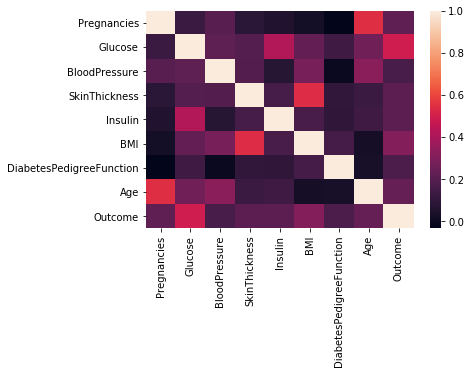

In [19]:
#Relation before Processing...
sns.heatmap(data.corr())

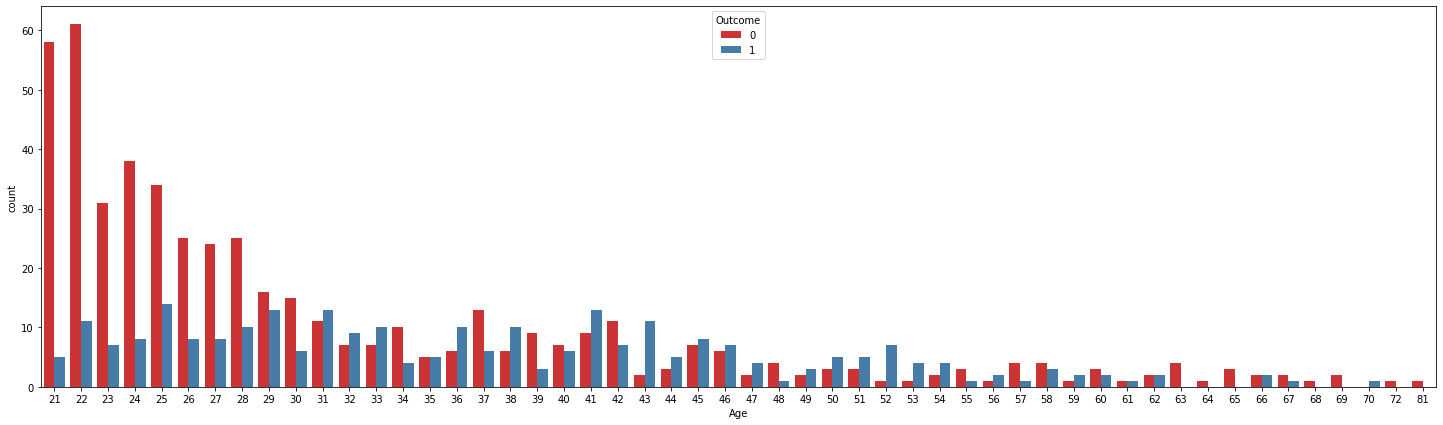

In [20]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

In [21]:

#splitting dataset into training and testing set...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:

#Scaling...
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Loading Model...
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [24]:
#fitting the model...
classifier.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [25]:
#Prediction...
y_pred = classifier.predict(X_test)

In [26]:
#Evaluation...
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [27]:
#Measuring Accuracy..
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [28]:
#LOGISTIC REGRESSION...

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("diabetes.csv", header=None, names=col_names)
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [31]:

diabetes_data = diabetes_data.iloc[1:]
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [32]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_data[feature_cols] # Features
y = diabetes_data.label

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred=logreg.predict(X_test)
y_pred

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array(['1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [36]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
662,1,0,42.9,22,199,76,1.394
123,2,100,33.6,23,107,74,0.404
114,4,0,34,25,76,62,0.391
15,5,175,25.8,51,166,72,0.587
530,0,0,24.6,31,111,65,0.66
...,...,...,...,...,...,...,...
367,6,0,27.6,29,124,72,0.368
302,2,135,31.6,25,144,58,0.422
383,1,182,25.4,21,109,60,0.947
141,3,0,21.1,55,128,78,0.268


In [37]:
# import the metrics class to create confusion matrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Text(0.5, 257.44, 'Predicted label')

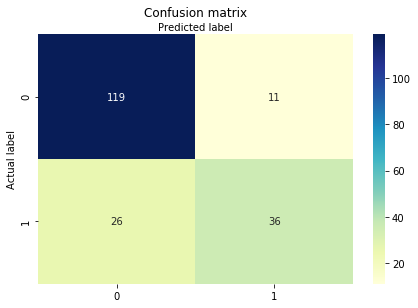

In [38]:
#VISUALIZATION....
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666
